In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-dark')
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
solid = pd.read_csv("/mnt/io/output/Data_solid.csv")
beam = pd.read_csv("/mnt/io/output/Data_beam.csv")
fit = pd.read_csv("/mnt/io/output/Data_fit.csv")

/tmp/ipykernel_146443/3702627671.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  beam = pd.read_csv("/mnt/io/output/Data_beam.csv")


In [3]:
names = solid["name"].unique()
completed_datasets = []
for name in names:
    if len(solid[solid["name"]==name]) >= 10:
        completed_datasets.append(name)
print(len(completed_datasets))

489


In [4]:
def plot_stiffness_tensor_components(uc_name):

    uc_beam = beam[beam['name'] == uc_name]
    uc_solid = solid[solid['name'] == uc_name]
    uc_fit = fit[fit['name'] == uc_name]
    
    plt.rcParams['figure.figsize'] = [20, 20]
    fig, axs = plt.subplots(6,6)

    components = uc_beam.columns[5:] 
    for component in components:

        comp = pd.concat(   
                            [   
                                uc_solid[["density",component]].assign(method="Solid"),
                                uc_beam[["density",component]].assign(method="Timoshenko"),
                                uc_fit[["density",component]].assign(method="adj. Timoshenko")
                            ],
                            ignore_index=True
                        )

        axis = axs[int(component[1])-1, int(component[2])-1]
        axis.set_ylim([0,np.max([comp[component].max(),0.01])])
        sns.lineplot(data=comp, x="density", y=component, hue="method", ax=axis, legend=False)

    fig.legend(["Solid","Timoshenko","adj. Timoshenko"], loc='upper right', fontsize=20, frameon=True)
    fig.suptitle(uc_name,fontsize=20)
    fig.tight_layout()

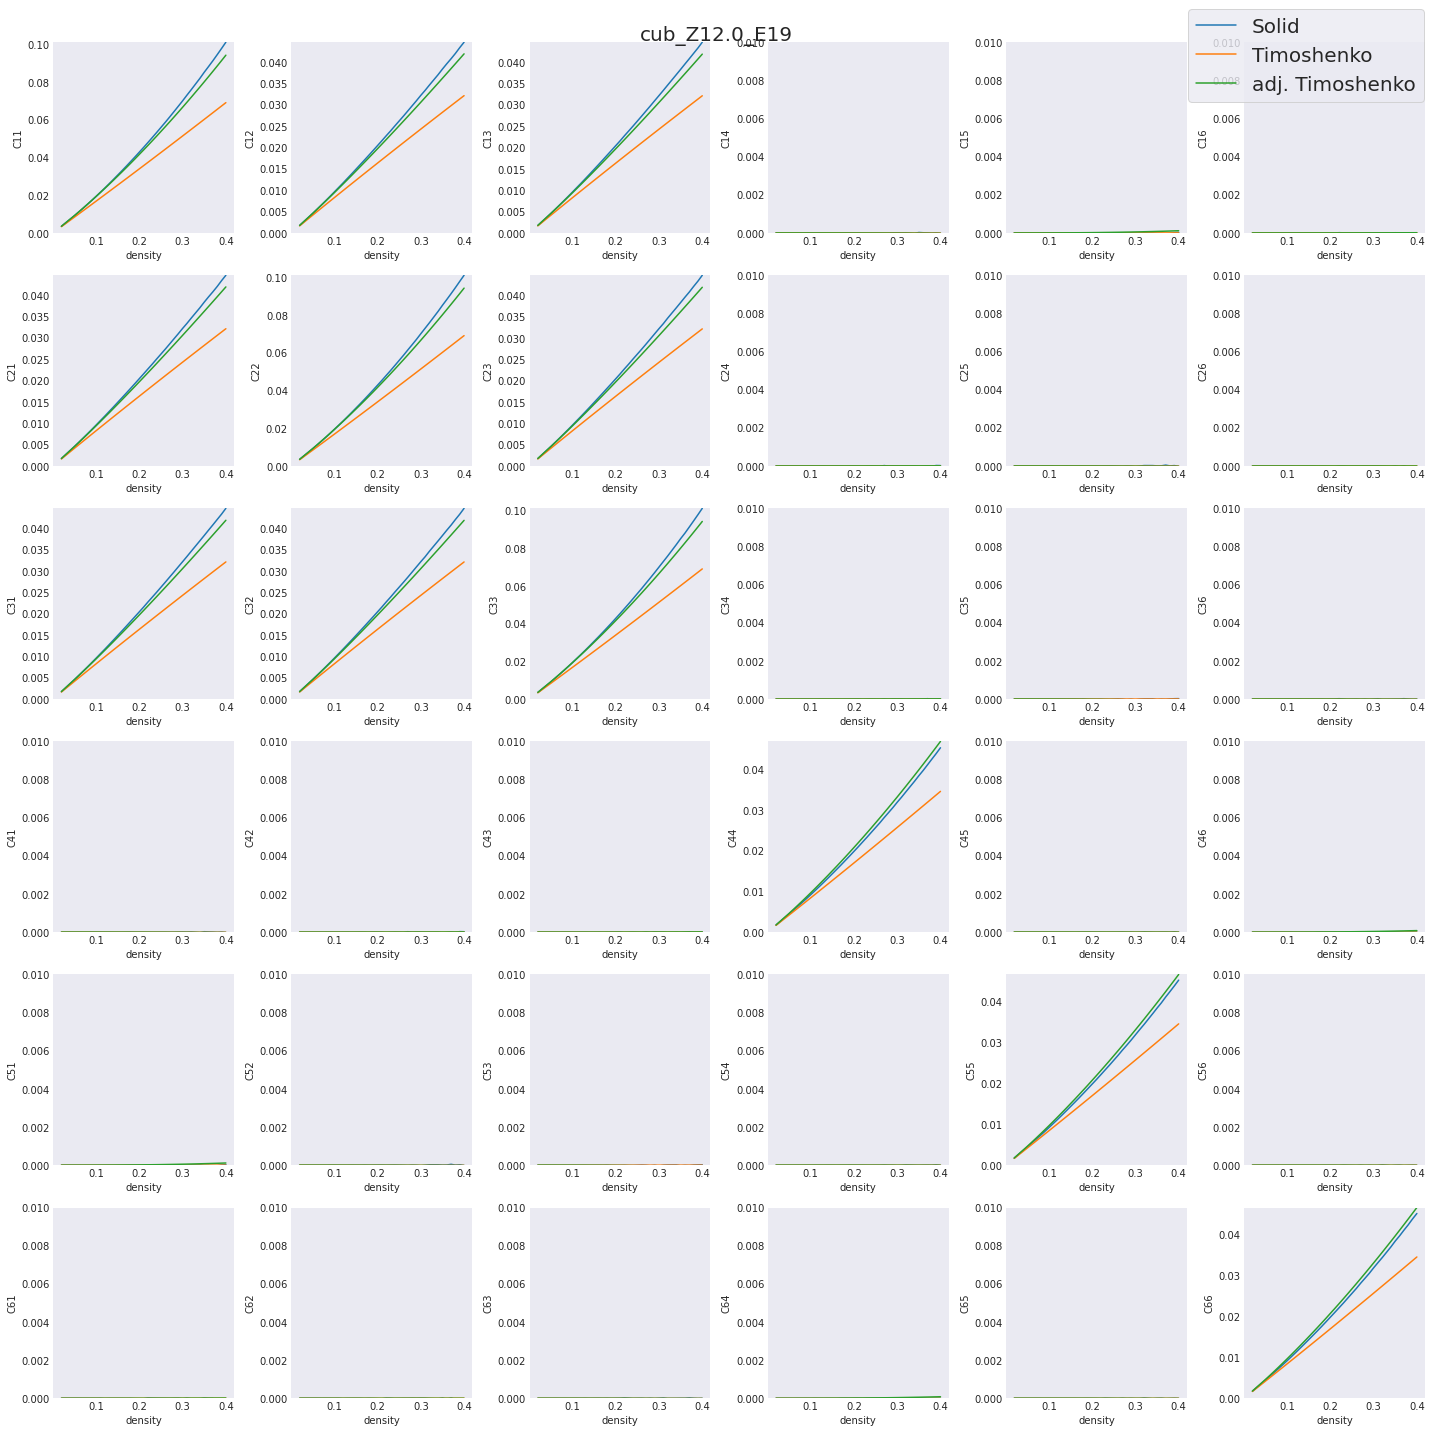

In [6]:
uc = "cub_Z12.0_E19"
plot_stiffness_tensor_components(uc)

In [7]:
for uc in completed_datasets:
    plot_stiffness_tensor_components(uc)
    plt.savefig("/mnt/io/postprocessing/stiffness_tensors/"+uc+".png")
    plt.close()